In [1]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Sending request to the website
url = "https://www.bbc.com/news"
response = requests.get(url)
print(response)
print(response.content)

<Response [200]>
b'<!DOCTYPE html>\n<html lang="en-GB" class="b-pw-1280 b-reith-sans-font no-touch" id="responsive-news">\n<head>\n    <meta charset="utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=1">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n    <meta name="google-site-verification" content="Tk6bx1127nACXoqt94L4-D-Of1fdr5gxrZ7u2Vtj9YI">\n    <link href="//static.bbc.co.uk" rel="preconnect" crossorigin>\n    <link href="//m.files.bbci.co.uk" rel="preconnect" crossorigin>\n    <link href="//nav.files.bbci.co.uk" rel="preconnect" crossorigin>\n    <link href="//ichef.bbci.co.uk" rel="preconnect" crossorigin>\n    <link rel="dns-prefetch" href="//mybbc.files.bbci.co.uk">\n    <link rel="dns-prefetch" href="//ssl.bbc.co.uk/">\n    <link rel="dns-prefetch" href="//sa.bbc.co.uk/">\n    <link rel="dns-prefetch" href="//ichef.bbci.co.uk">\n\n\n    <link rel="preload" as="style" href="//m.files.bbci.co.uk/modules/bbc-mor

In [3]:
# Parse the HTML content
soup = BeautifulSoup(response.content, "html.parser")


In [4]:
# Find all news headline containers
headline_containers = soup.find_all("h3", {"class": "gs-c-promo-heading__title"})


In [5]:
# Create empty lists to store the raw and cleaned headlines
raw_headlines = []
cleaned_headlines = []


In [6]:
# Loop through each headline container and extract the headline text
for container in headline_containers:
    headline = container.text.strip()
    raw_headlines.append(headline)
    cleaned_headline = headline.replace("\n", "").replace("\t", "")
    cleaned_headlines.append(cleaned_headline)


In [7]:
 #Write the headlines to a CSV file
with open("headlines.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["ID", "Raw Headline", "Cleaned Headline"])
    for i, (raw_headline, cleaned_headline) in enumerate(zip(raw_headlines, cleaned_headlines), 1):
        writer.writerow([i, raw_headline, cleaned_headline])
print(" --------------------------- CSV file is saved Successfully ----------------------------")

 --------------------------- CSV file is saved Successfully ----------------------------


In [8]:
df = pd.DataFrame(cleaned_headlines, columns=["Headline"])
df.insert(0, "Number", range(1, 1 + len(df)))
df.to_csv("headlines.csv", index=False)
print(df.tail(10))

    Number                                           Headline
35      36             Can kelp help people travel the world?
36      37                Why work drinking culture is fading
37      38                  The clam as large as a human hand
38      39   Bayern Munich sack Nagelsmann and appoint Tuchel
39      40        Premier League refers Everton over finances
40      41  Stand-in keeper to record breaker - the making...
41      42      Messi scores 800th goal in top-level football
42      43            How Kane broke the England goals record
43      44  Player interviewed over further alleged sexual...
44      45  Leeds close Elland Road ground after police ad...


##DATA VISUALIZATION

In [13]:
df['Headline Length'] = df['Headline'].apply(len)


<Axes: xlabel='Number'>

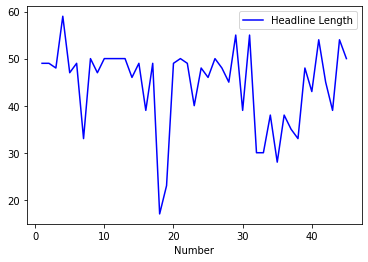

In [14]:
df.plot(x='Number', y='Headline Length', kind='line', color='blue')


In [16]:
df['Word Count'] = df['Headline'].apply(lambda x: len(x.split()))


<Axes: xlabel='Number'>

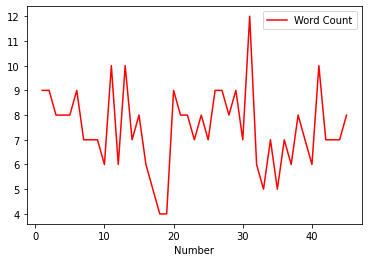

In [18]:
# Plot the word count vs headline number
df.plot(x='Number', y='Word Count', kind='line', color='red')

In [ ]:
word_counts = df["Cleaned Headline"].str.split(expand=True).stack().value_counts()
top_10_words = word_counts[:10]
top_10_words.plot(kind="bar")
plt.title("Top 10 Most Frequent Words in Headlines")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

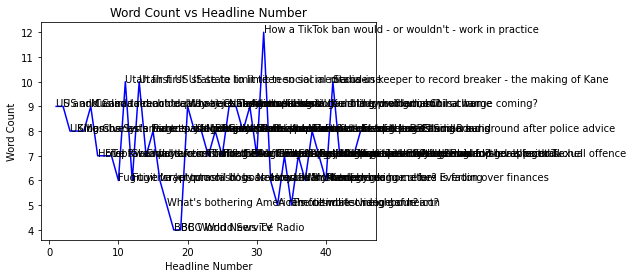

In [22]:
# Plot the word count and headline number
fig, ax = plt.subplots()
ax.plot(df['Number'], df['Word Count'], color='blue')

# Set the plot title and axis labels
ax.set_title('Word Count vs Headline Number')
ax.set_xlabel('Headline Number')
ax.set_ylabel('Word Count')

# Add the headline text as annotations
for i, row in df.iterrows():
    ax.annotate(row['Headline'], xy=(row['Number'], row['Word Count']))

# Display the plot
plt.show()


##DATA ANALYSIS OF NEWS


In [23]:
# Print basic information about the dataset
print('Number of headlines:', len(df))
print('Average word count:', round(df['Word Count'].mean(), 2))
print('Minimum word count:', df['Word Count'].min())
print('Maximum word count:', df['Word Count'].max())

Number of headlines: 45
Average word count: 7.44
Minimum word count: 4
Maximum word count: 12


(array([ 2.,  0.,  3.,  0.,  0.,  6.,  0., 13.,  0.,  0., 10.,  0.,  7.,
         0.,  0.,  3.,  0.,  0.,  0.,  1.]),
 array([ 4. ,  4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ,
         8.4,  8.8,  9.2,  9.6, 10. , 10.4, 10.8, 11.2, 11.6, 12. ]),
 <BarContainer object of 20 artists>)

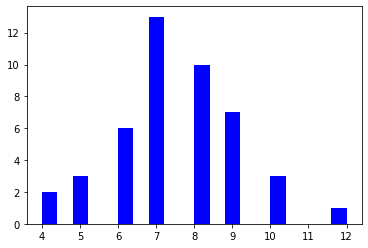

In [24]:
# Plot a histogram of the word count distribution
fig, ax = plt.subplots()
ax.hist(df['Word Count'], bins=20, color='blue')


In [25]:
# Set the plot title and axis labels
ax.set_title('Word Count Distribution')
ax.set_xlabel('Word Count')
ax.set_ylabel('Frequency')


Text(3.1999999999999993, 0.5, 'Frequency')

    Number                                           Headline
40      41  Stand-in keeper to record breaker - the making...
41      42      Messi scores 800th goal in top-level football
42      43            How Kane broke the England goals record
43      44  Player interviewed over further alleged sexual...
44      45  Leeds close Elland Road ground after police ad...


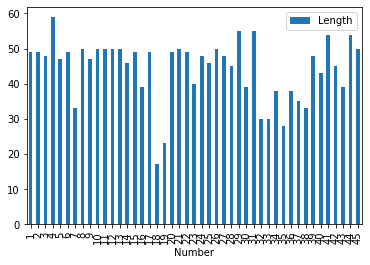

In [26]:
df = pd.DataFrame(cleaned_headlines, columns=["Headline"])
df.insert(0, "Number", range(1, 1 + len(df)))
df.to_csv("headlines.csv", index=False)
print(df.tail(5))

df["Length"] = df["Headline"].apply(len)
df.plot(kind="bar", x="Number", y="Length")
plt.show()